In [2]:
#First Implementation with Boosted Decision Tree
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Data is stored in pandas -> Each 

In [3]:
data=pd.read_csv('data/Total_ML_Training_data.csv',header=[0])
valid=pd.read_csv('data/Total_Valid_data.csv')

In [4]:
data["j1pt","j1phi"]

KeyError: ('j1pt', 'j1phi')

In [3]:
data.head()

,j1pt,j1phi,j1eta,j1mass,j2pt,j2phi,j2eta,j2mass,j3pt,j3phi,...,j12deta,j23deta,j13deta,j12dphi,j23dphi,j13dphi,j1j2mass,j2j3mass,j1j3mass,event
0,122.6875,-2.919922,0.445801,12.101562,87.8750,-0.455444,1.209473,9.109375,44.43750,1.443604,...,-0.763672,0.513184,-0.250488,-2.464478,-1.899048,-4.363525,21.210938,13.324219,16.316406,8498517
1,122.6875,-2.919922,0.445801,12.101562,87.8750,-0.455444,1.209473,9.109375,36.21875,-3.072266,...,-0.763672,-0.192627,-0.956299,-2.464478,2.616821,0.152344,21.210938,15.972656,18.964844,8498517
2,122.6875,-2.919922,0.445801,12.101562,87.8750,-0.455444,1.209473,9.109375,31.90625,-0.616455,...,-0.763672,0.948059,0.184387,-2.464478,0.161011,-2.303467,21.210938,14.609375,17.601562,8498517
3,122.6875,-2.919922,0.445801,12.101562,44.4375,1.443604,0.696289,4.214844,36.21875,-3.072266,...,-0.250488,-0.705811,-0.956299,-4.363525,4.515869,0.152344,16.316406,11.078125,18.964844,8498517
4,122.6875,-2.919922,0.445801,12.101562,44.4375,1.443604,0.696289,4.214844,31.90625,-0.616455,...,-0.250488,0.434876,0.184387,-4.363525,2.060059,-2.303467,16.316406,9.714844,17.601562,8498517


In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt 

In [5]:
data=data.drop(["event"],axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data, valid, test_size=0.2, random_state=1997)
trainDmatrix=xgb.DMatrix(data=X1_train,label=y1_train)
valDmatrix=xgb.DMatrix(data=X1_test,label=y1_test)

In [8]:
params={"objective":"binary:logistic",'num_parallel_tree':6,'colsample_bytree': 0.5,'learning_rate': .8,
                'max_depth': 5, 'alpha':.01}
xg_reg = xgb.train(params=params, dtrain=trainDmatrix, num_boost_round=20)

[14:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


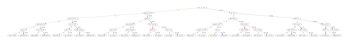

In [9]:
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

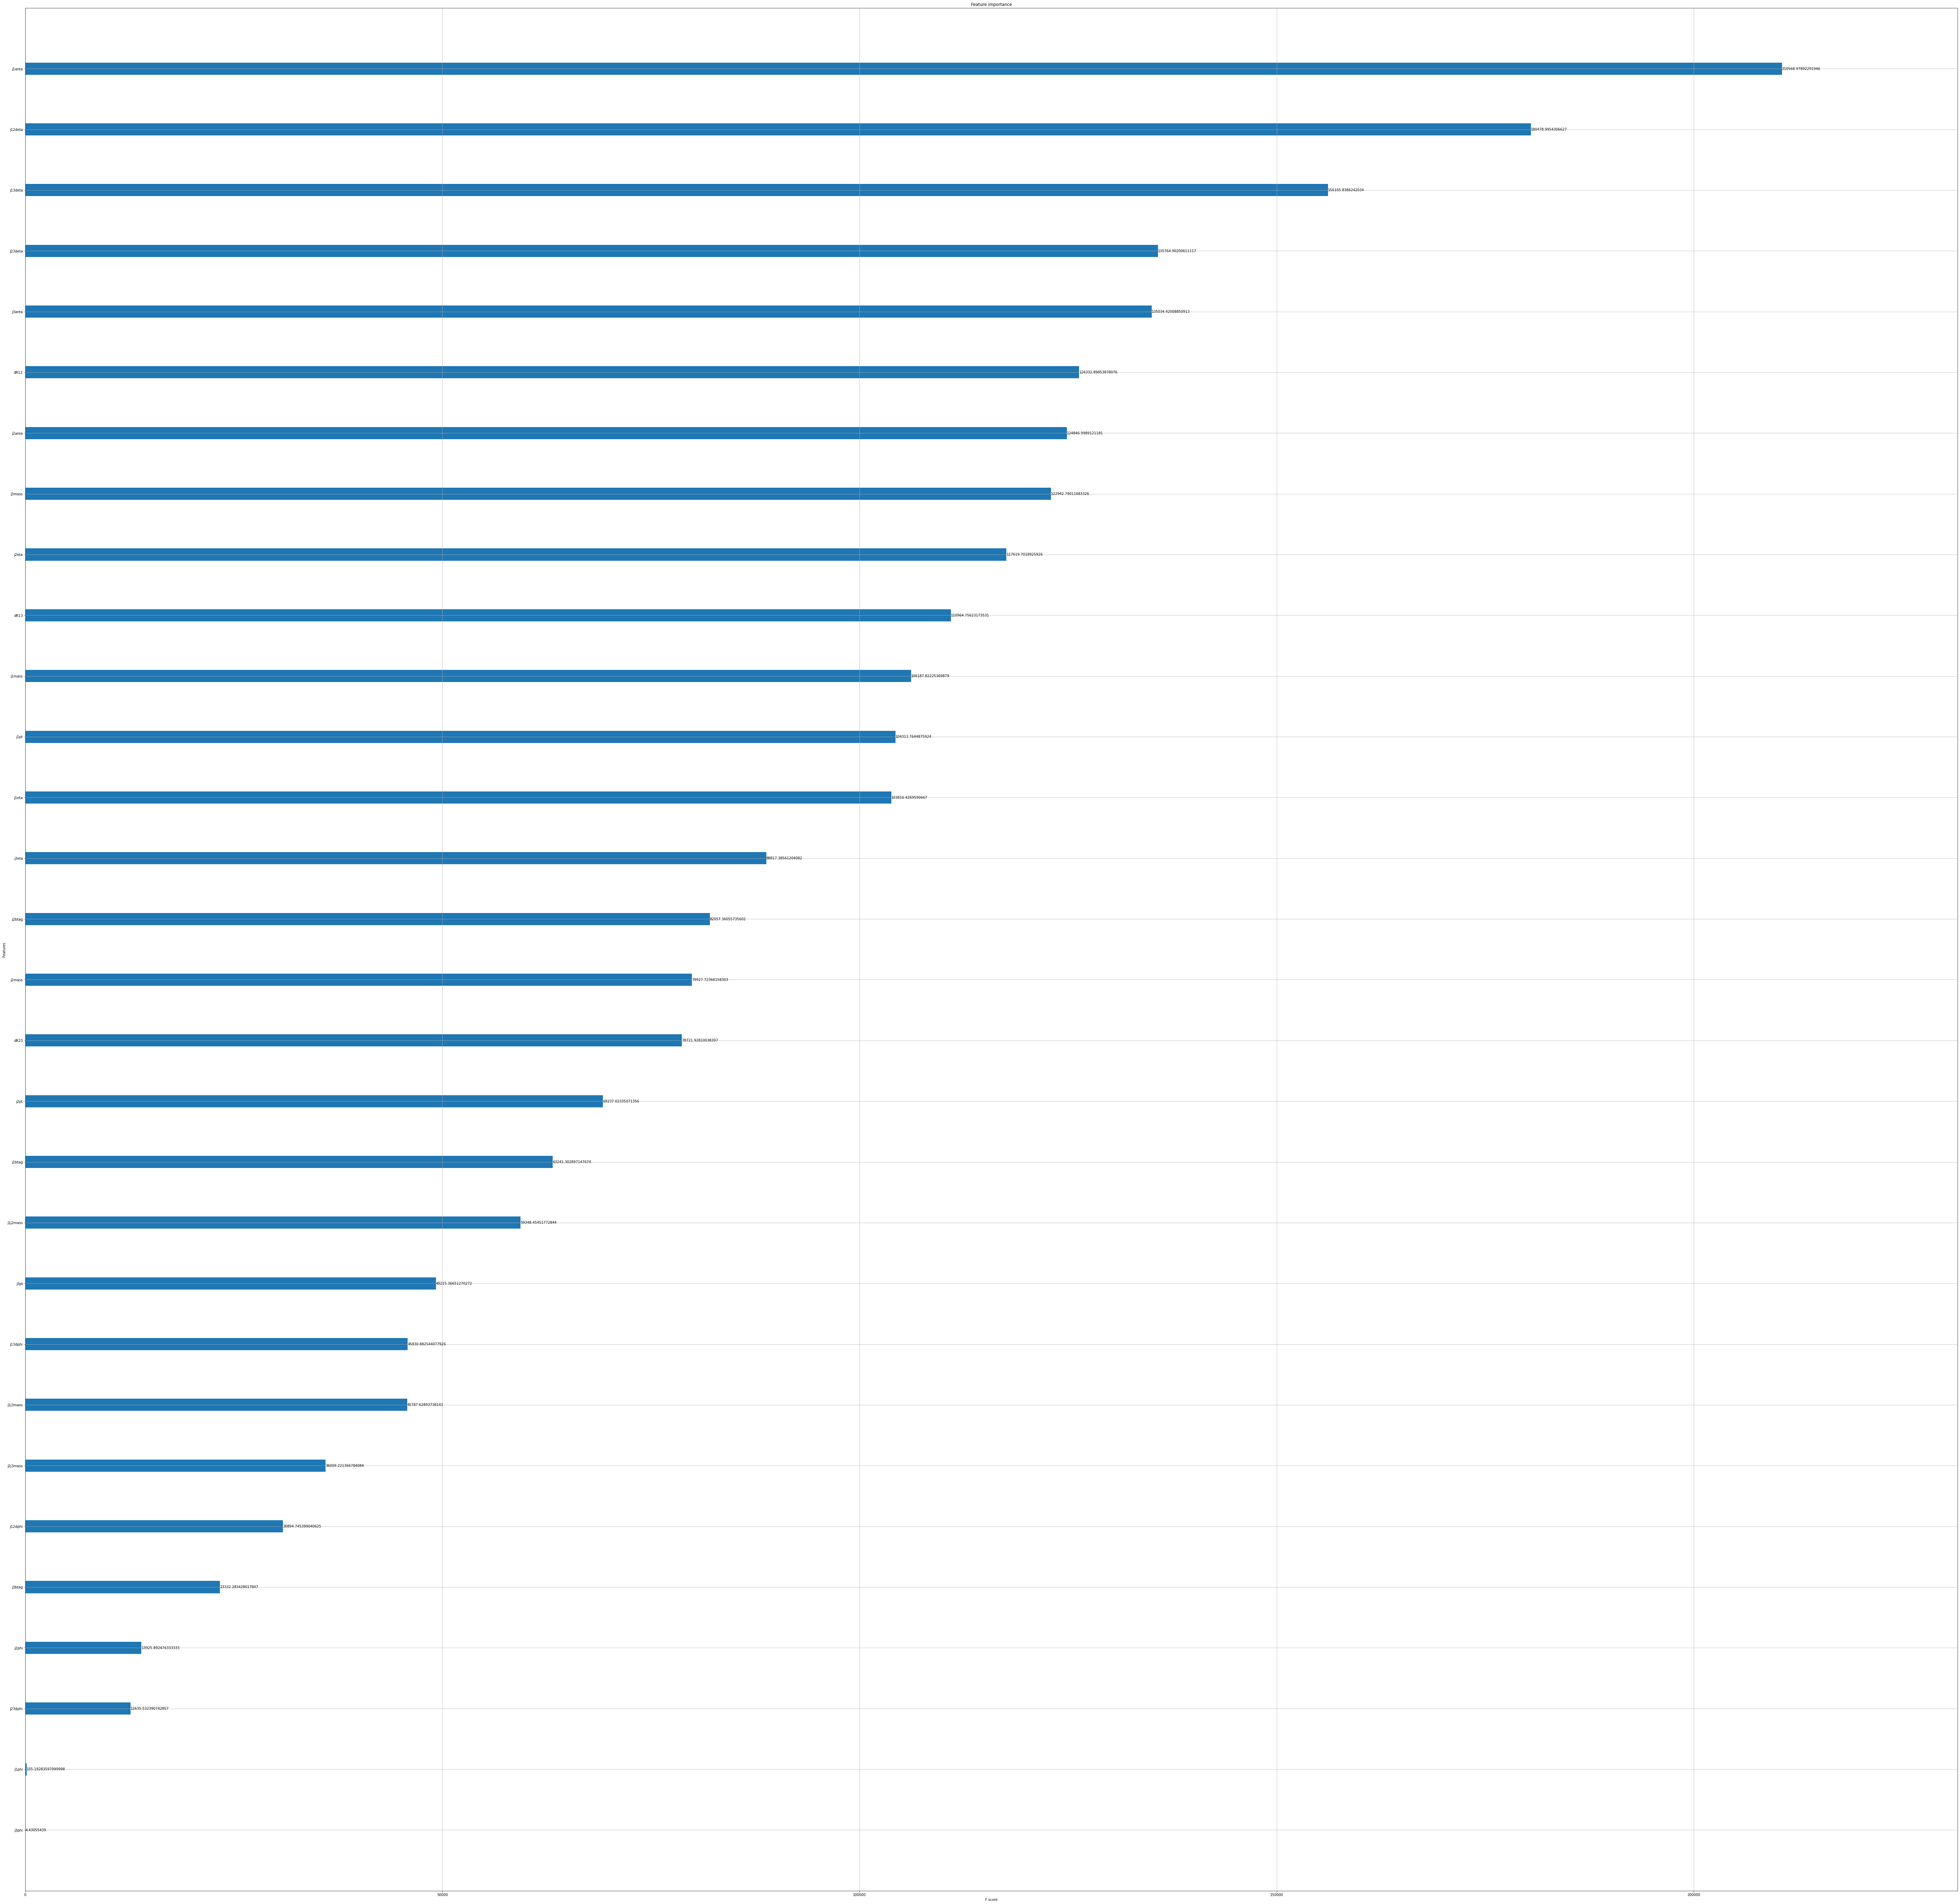

In [10]:
xgb.plot_importance(xg_reg,importance_type='cover')

In [11]:
print(y1_test)

NameError: name 'y_test' is not defined

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

predictions = xg_reg.predict(xgb.DMatrix(data=X1_test))
yt=np.array(y1_test.values).flatten()

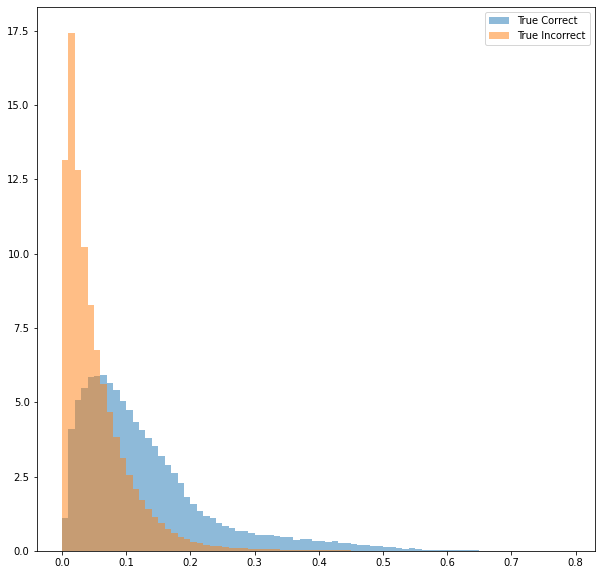

In [16]:
TrueCorrectSets=predictions[yt==1]
TrueIncorrectSets=predictions[yt==0]
bins1=[]
n=0
while n<80:
    bins1.append(n*.01)
    n=n+1
plt.figure(figsize=(10,10))
plt.hist(TrueCorrectSets,bins=bins1,alpha=.5,density=True)
plt.hist(TrueIncorrectSets,bins=bins1,alpha=.5,density=True)
plt.legend(["True Correct","True Incorrect"])

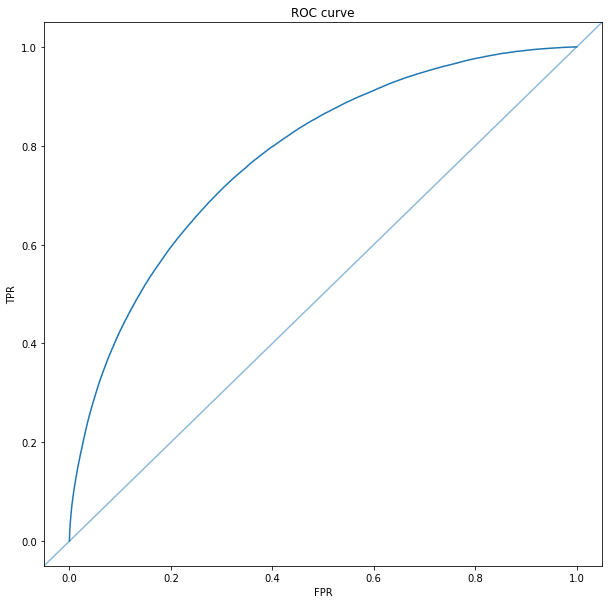

In [17]:
fpr, tpr, _ = roc_curve(yt, predictions)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.axline((0, 0), (1, 1),alpha=.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig("ROC_Curve_Validation_Boosted_Decision_Tree.png",format="png")
plt.show()


In [ ]:
#ToDo compare probabilities of true good M3 and bad M3

In [20]:
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#pred=[1 if n>=.12 else 0 for n in predictions]
#print(len(predictions[predictions>=1]))
#print(len(yt[yt>=1]))

0
127062


In [21]:
#cm=confusion_matrix(np.array(y1_test.values).flatten(), predictions)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

In [22]:
#disp.plot()

In [18]:
xg_reg.save_model("ExtraKinematicsTotalBTD.json")

In [24]:
xg_reg.best_ntree_limit

150